# Analysing Data: Assignment 2
Henry Hornung - S4156145

### Importing Modules and Data

In [1]:
# Importing modules
import os
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

In [2]:
# Importing data
full_data = pd.read_csv("data_full.csv")
full_data.head()

,num,msttr,ari,fg,fe,words,comm
0,102,0.705500,6.2,3.7,86.50,1494,10
1,107,0.701875,6.2,4.8,83.76,3469,8
2,106,0.710899,9.2,7.3,77.16,7559,21
3,107,0.710899,9.2,7.3,77.16,7559,21
4,124,0.701765,9.8,6.7,78.89,1465,0


### Plotting Data

In [3]:
# Defining function to plot selected variables on a scatterplot
def show_plot(x, y, figname):
    xlist = full_data[x].sort_values().to_list()
    ylist = full_data[y].sort_values().to_list()
    plt.scatter(full_data[x], full_data[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.savefig(f"scatterplots/{figname}", bbox_inches = "tight")
    plt.show()
    #plt.plot([xlist[0], xlist[-1]], [ylist[0], ylist[-1]], color='black')

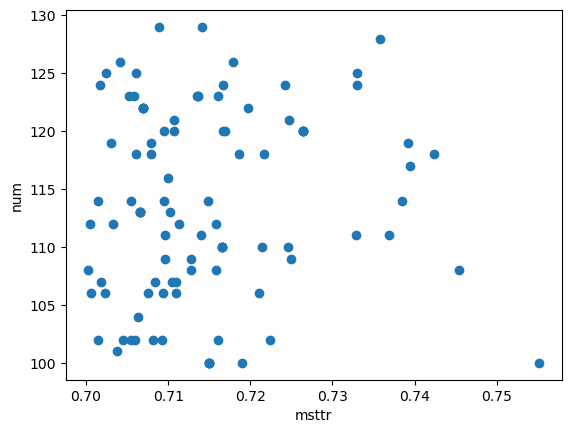

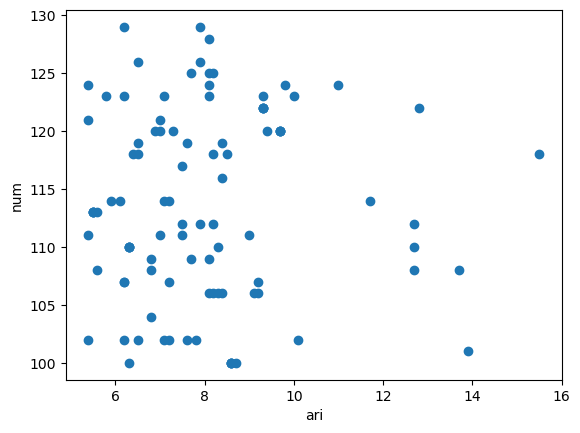

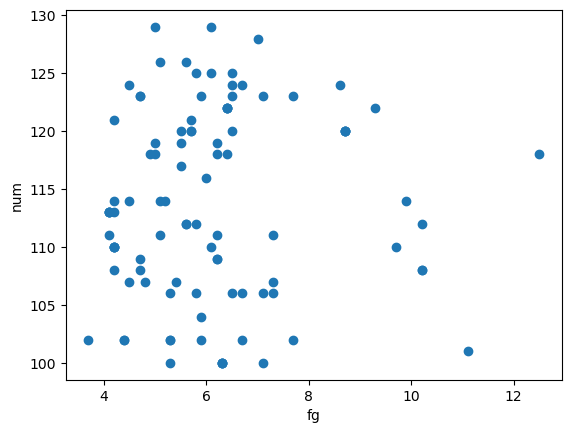

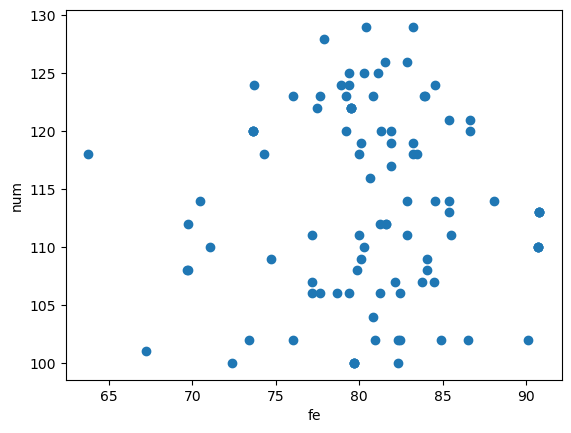

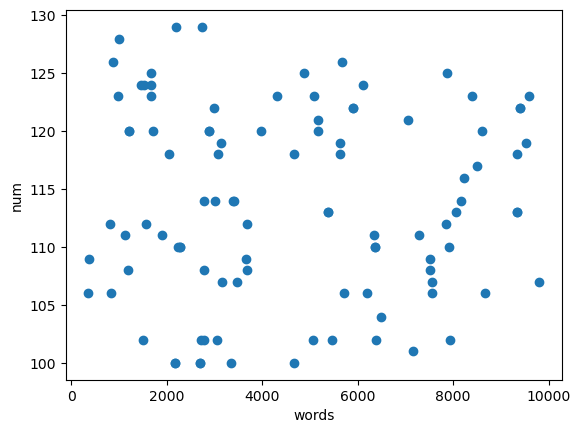

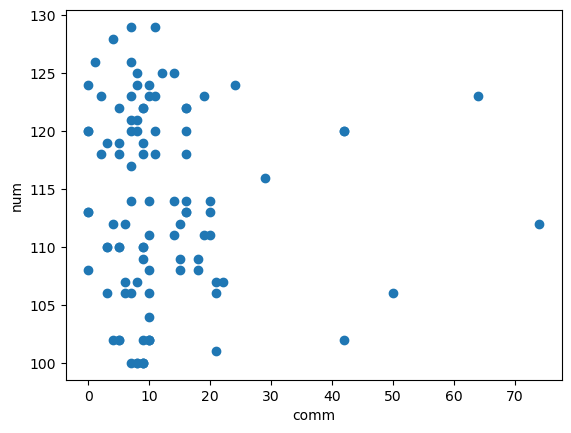

In [4]:
# Plotting each possible predictor with the dependent variable.
show_plot("msttr", "num", "1")
show_plot("ari", "num", "2")
show_plot("fg", "num", "3")
show_plot("fe", "num", "4")
show_plot("words", "num", "5")
show_plot("comm", "num", "6")

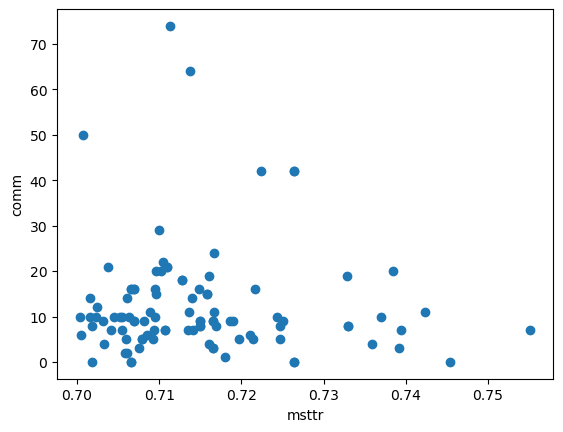

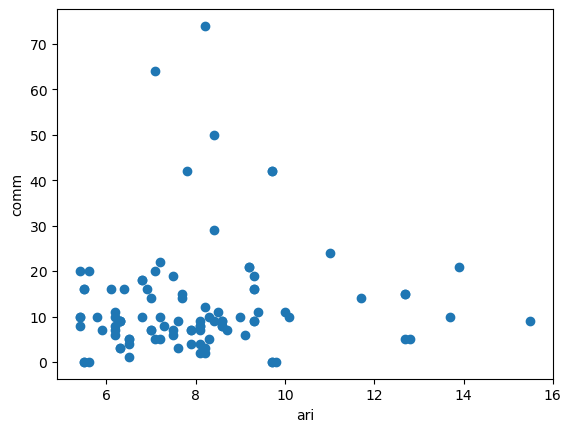

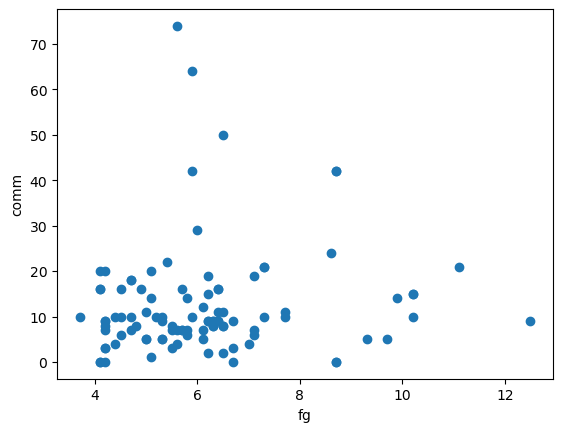

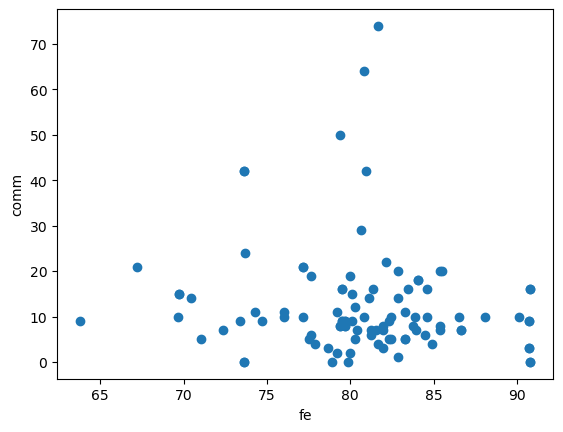

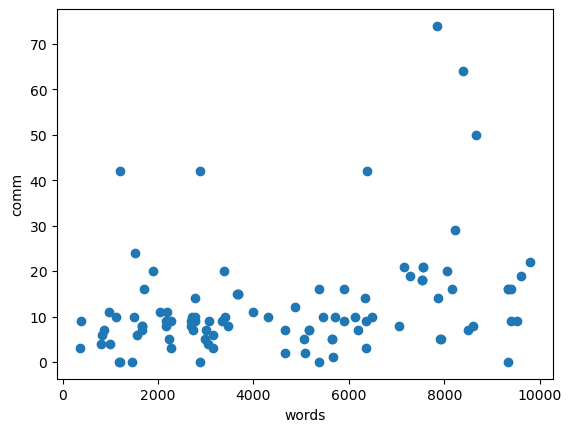

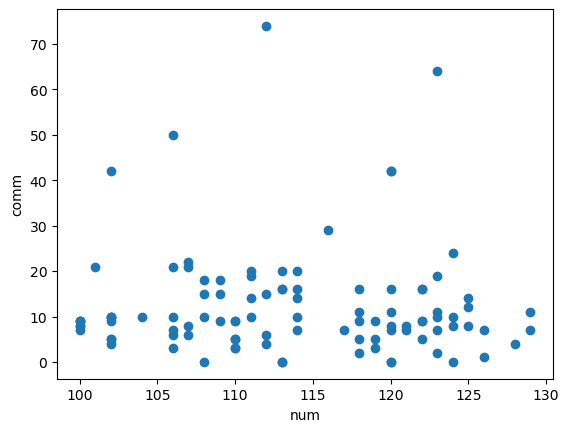

In [5]:
# Another potential dependent variable could be comments, as a more successful story would likely have more comments
show_plot("msttr", "comm", 7)
show_plot("ari", "comm", 8)
show_plot("fg", "comm", 9)
show_plot("fe", "comm", 10)
show_plot("words", "comm", 11)
show_plot("num", "comm", 12)

### Metrics and Best Fit

In [6]:
# Defining function to output slope, intercept and r-squared values, as well as create scatter plot with line of best fit.
def linreg(x, y, predictor, plotyn, figname):
    
    # Preparing the data
    df = pd.DataFrame({"x": x, "y": y})
    X = df["x"].values.reshape(-1, 1)
    y_clean = df["y"].values
    
    # Training the model
    model = LinearRegression()
    model.fit(X, y_clean)

    # Getting the metrics
    slope = model.coef_[0]
    intercept = model.intercept_
    r_squared = model.score(X, y_clean)

    # Creating the plot
    if plotyn == True:
        plt.scatter(X, y_clean, label = "Story")
        plt.plot(X, model.predict(X), color = "red", label = f"y = {intercept:.3f} + {slope:.3f}x \n$R^2 = {r_squared:.3f}$")
        plt.xlabel(predictor)
        plt.ylabel("y")
        plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))
        plt.savefig(f"figures/{figname}", bbox_inches = "tight")
        plt.show()
    
    # Returning a list allows for selecting of specific values as needed by slicing.
    return [slope, intercept, r_squared]

In [7]:
# Creating a df with each predictor's metrics.
predictors = list(full_data.columns.values)[1:]

metricdf = pd.DataFrame()
metricdf["predictor"] = predictors
metricdf["slope"] = [linreg(full_data[var], full_data["num"], var, False, "na")[0] for var in predictors]
metricdf["intercept"] = [linreg(full_data[var], full_data["num"], var, False, "na")[1] for var in predictors]
metricdf["r-squared"] = [linreg(full_data[var], full_data["num"], var, False, "na")[2] for var in predictors]

metricdf

,predictor,slope,intercept,r-squared
0,msttr,59.364899,71.272043,0.006514
1,ari,0.085157,113.016022,0.000451
2,fg,0.245610,112.193426,0.002700
3,fe,-0.017559,115.116474,0.000138
4,words,-0.000009,113.743081,0.000010
5,comm,-0.012928,113.860437,0.000370


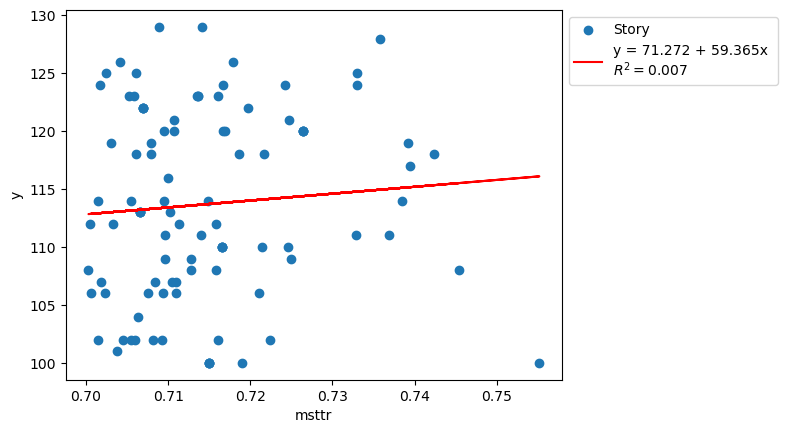

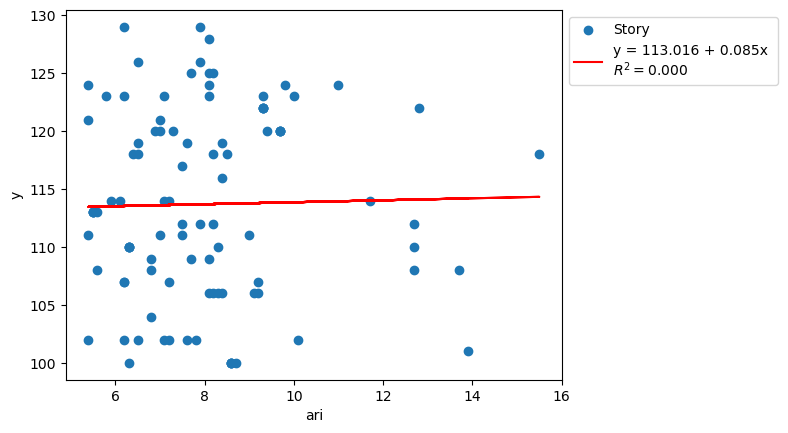

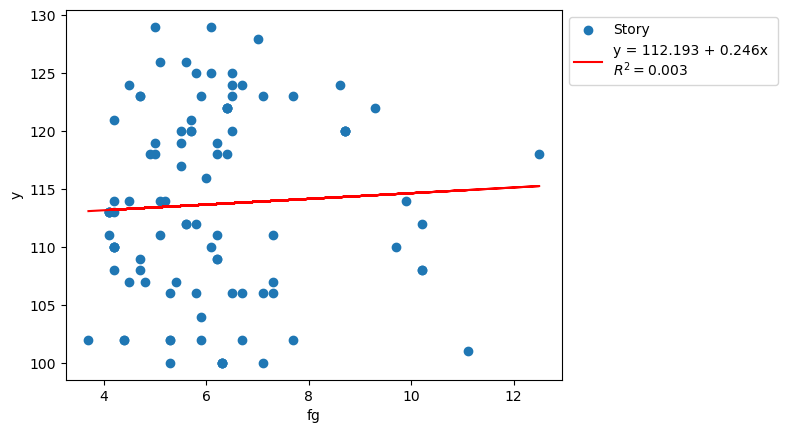

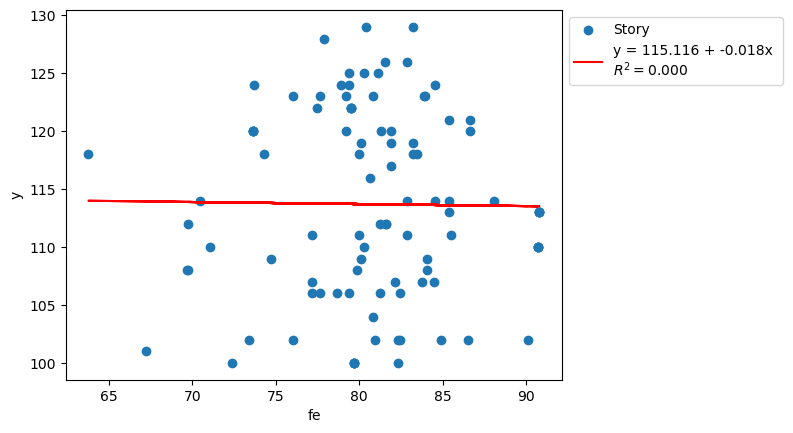

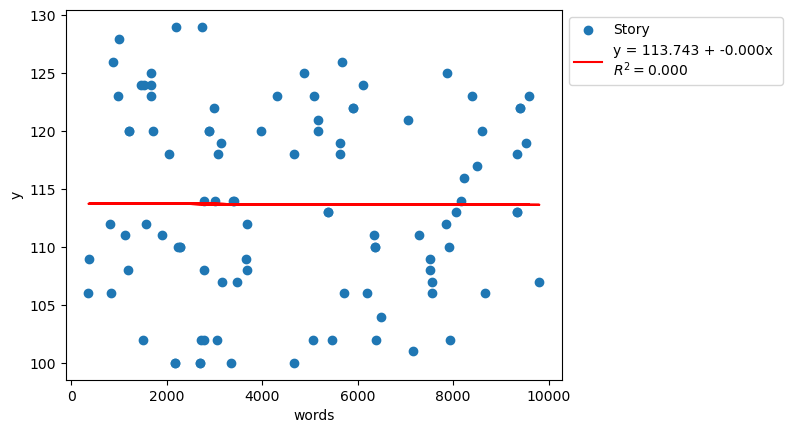

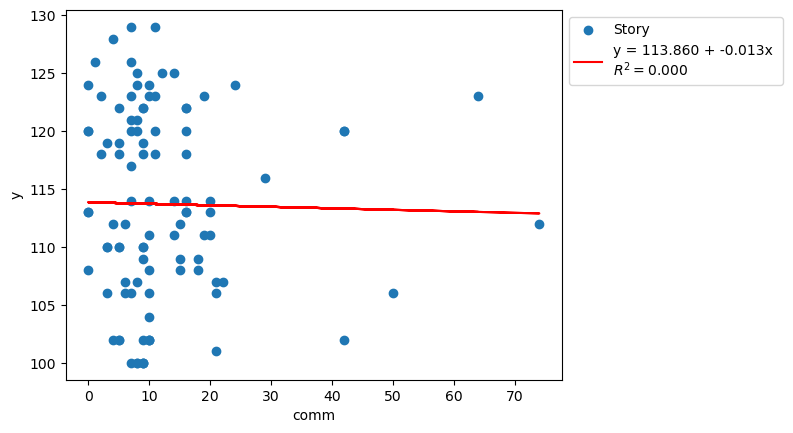

In [8]:
# Visualising each scatterplot with the line of best fit.
n = 1 # This variable is to assign a name to the figures when they are exported.
for var in predictors:
    linreg(full_data[var], full_data["num"], var, True, n)
    n += 1

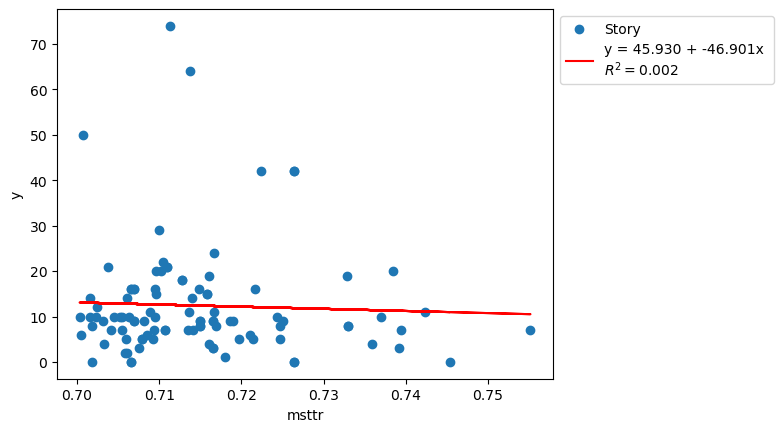

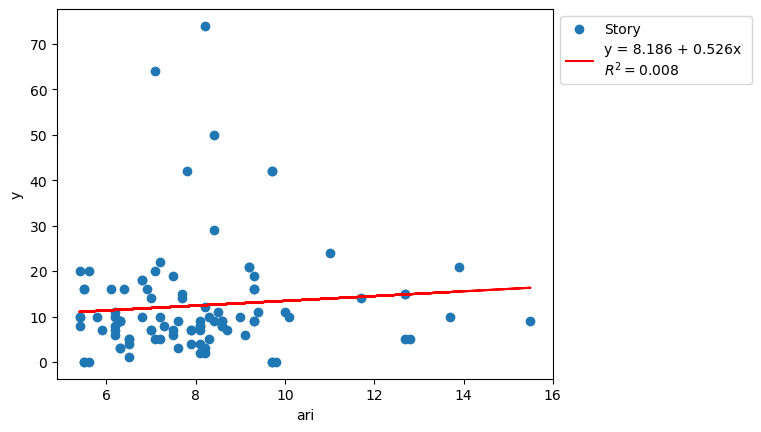

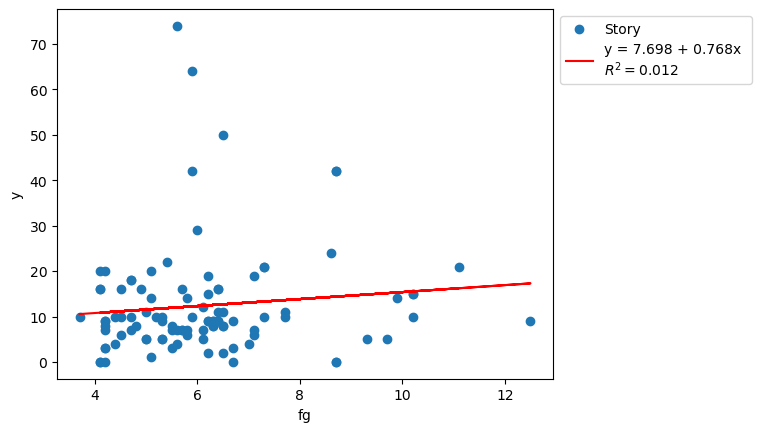

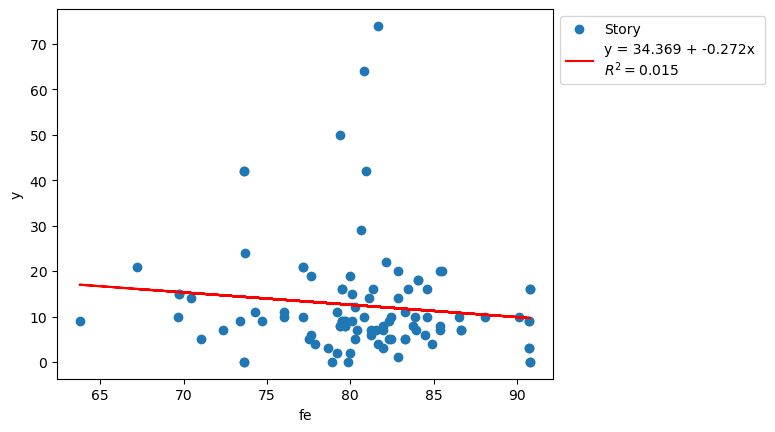

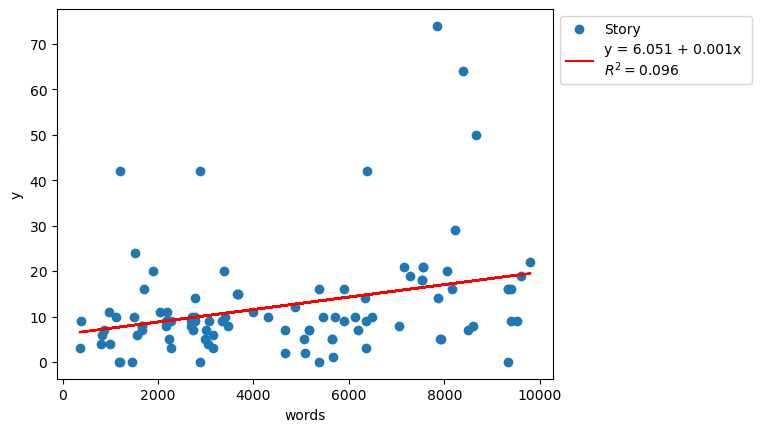

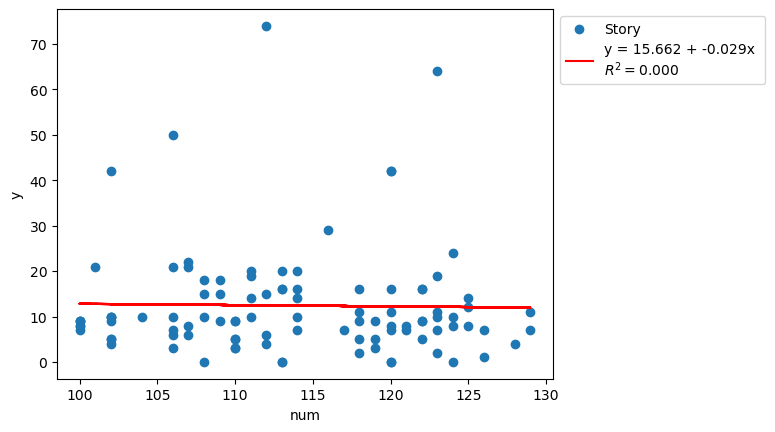

[-0.02860391086857659, 15.662264665757158, 0.0003697922526975095]

In [9]:
# Repeating the same process, using "comm" as y variable.
n = 19 # This variable is to assign a name to the figures when they are exported.
for var in predictors[:-1]:
    linreg(full_data[var], full_data["comm"], var, True, n)
    n += 1

linreg(full_data["num"], full_data["comm"], "num", True, 24)

### Residuals

In [10]:
# Modifying the linreg function to include the residuals.
def linregres(x, y, predictor, figname):
    # The steps in the following lines are unchanged, thus the labels are removed.
    df = pd.DataFrame({"x": x, "y": y})
    X = df["x"].values.reshape(-1, 1)
    y_clean = df["y"].values
    model = LinearRegression()
    model.fit(X, y_clean)
    slope = model.coef_[0]
    intercept = model.intercept_
    r_squared = model.score(X, y_clean)

    # Calculate residuals
    y_pred = model.predict(X)
    residuals = y_clean - y_pred
    
    # Create plot (the t/f condition is removed since this function exists only to plot the residuals)
    plt.scatter(X, y_clean, label = "Story")
    plt.plot(X, model.predict(X), color = "red", label = f"y = {intercept:.3f} + {slope:.3f}x \n$R^2 = {r_squared:.3f}$")
    plt.vlines(X.flatten(), y_clean, y_pred, colors = "gray", label = "Residuals")
    plt.xlabel(predictor)
    plt.ylabel("y")
    plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))
    plt.savefig(f"figures/{figname}", bbox_inches = "tight")
    plt.show()

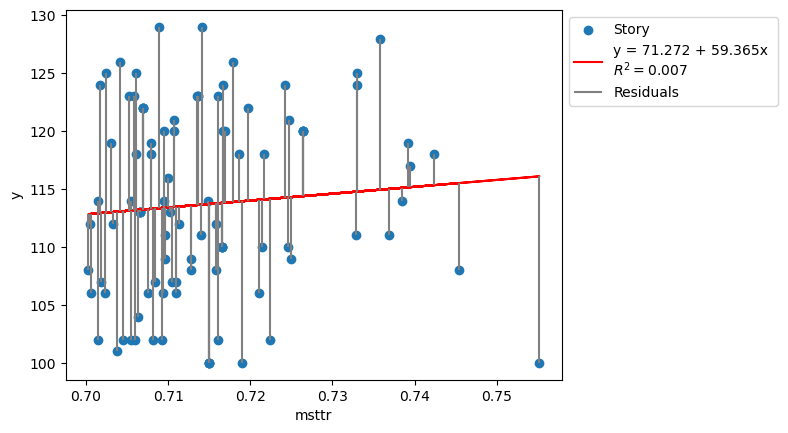

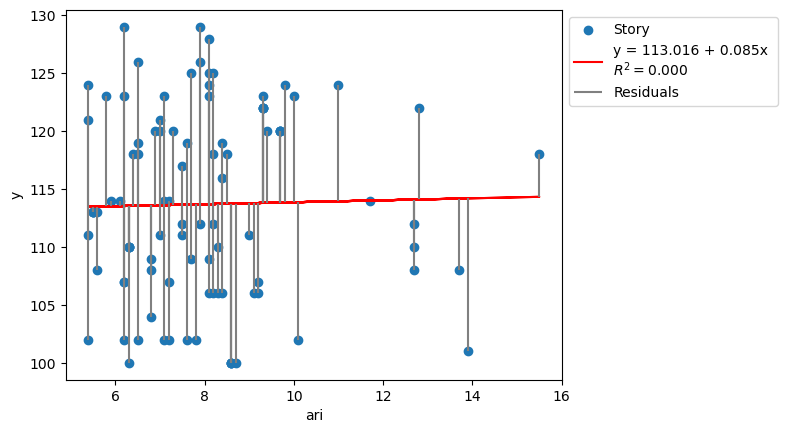

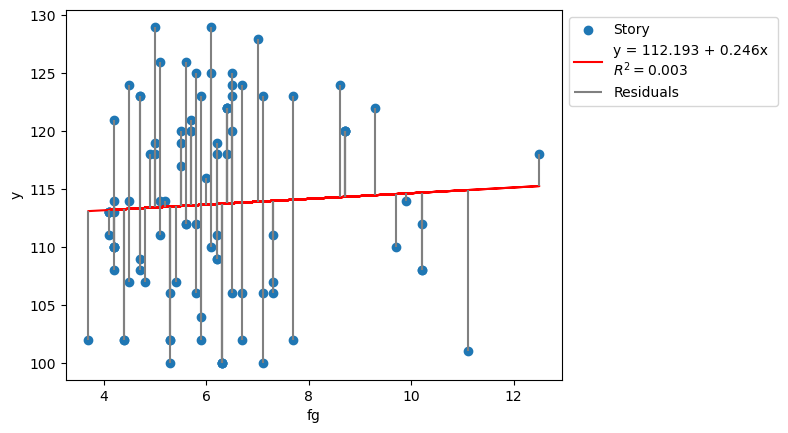

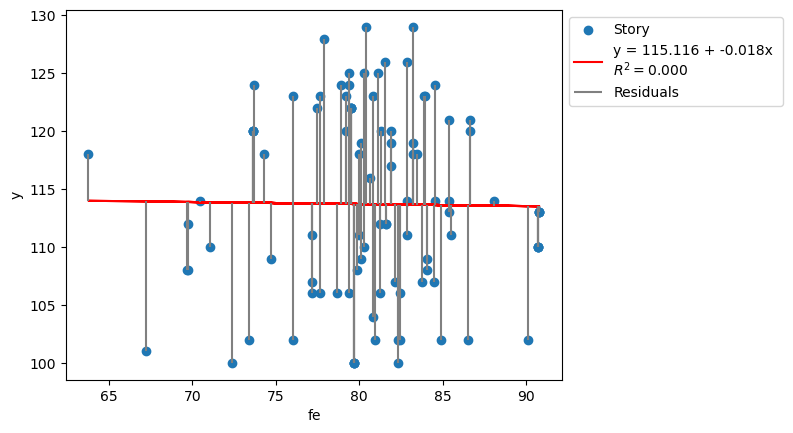

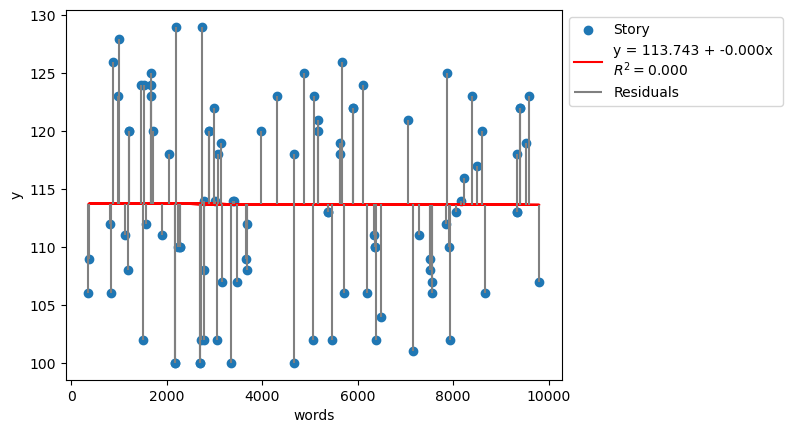

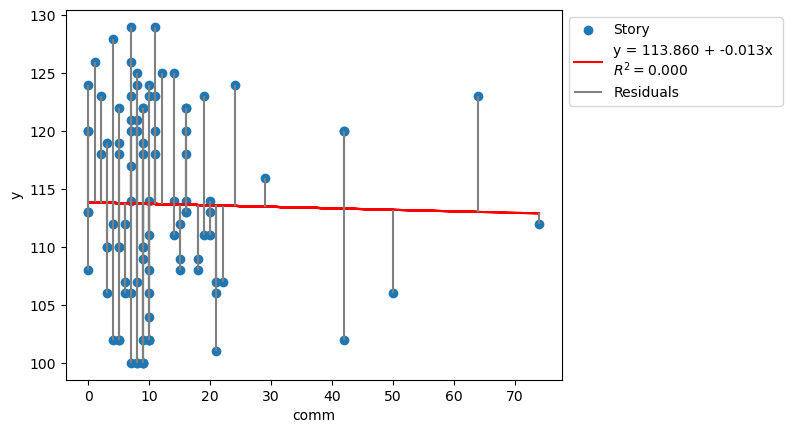

In [11]:
# Visualising each scatterplot incl line of best fit and residuals.
n = 7
for var in predictors:
    linregres(full_data[var], full_data["num"], var, n)
    n += 1

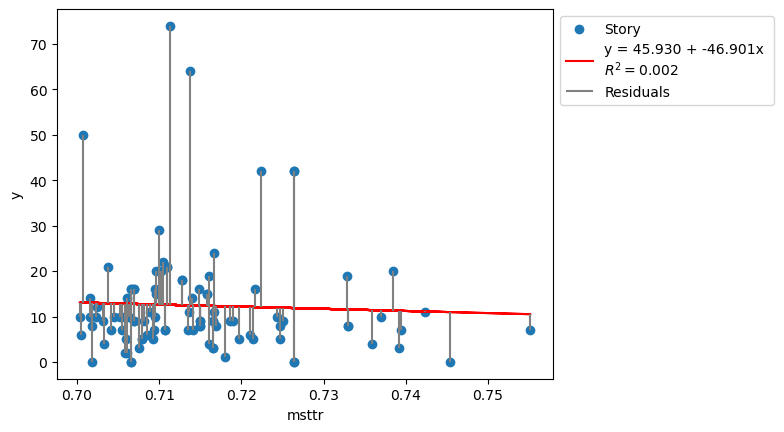

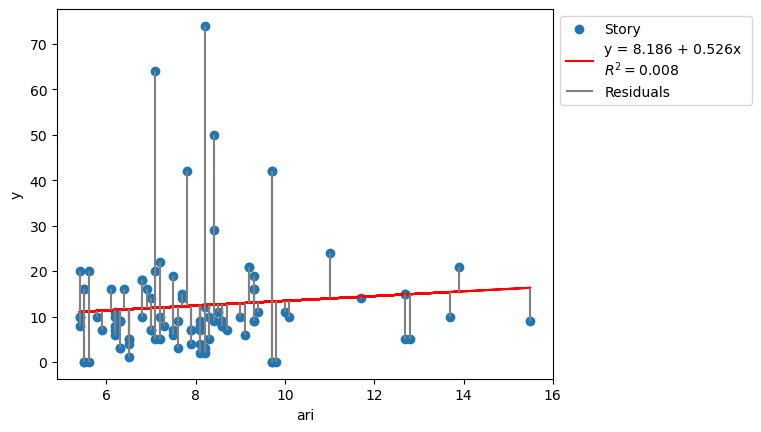

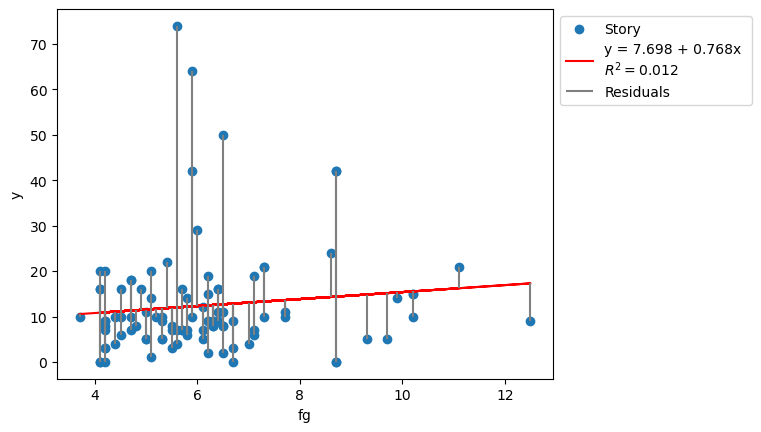

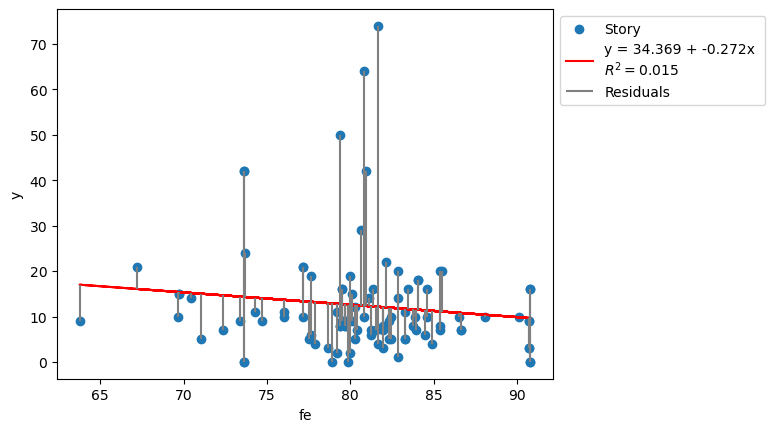

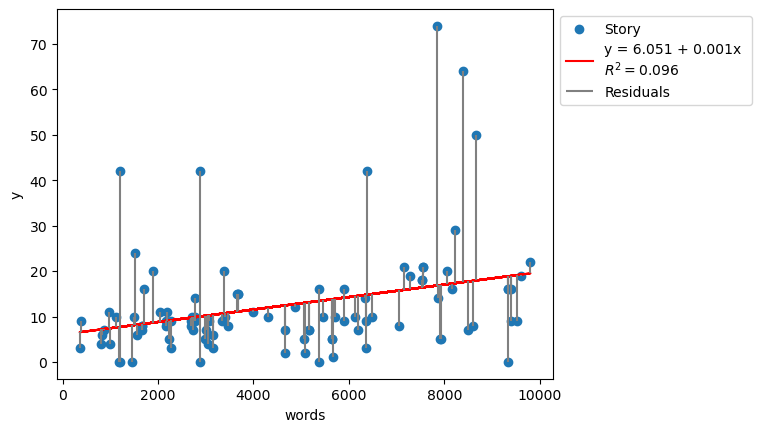

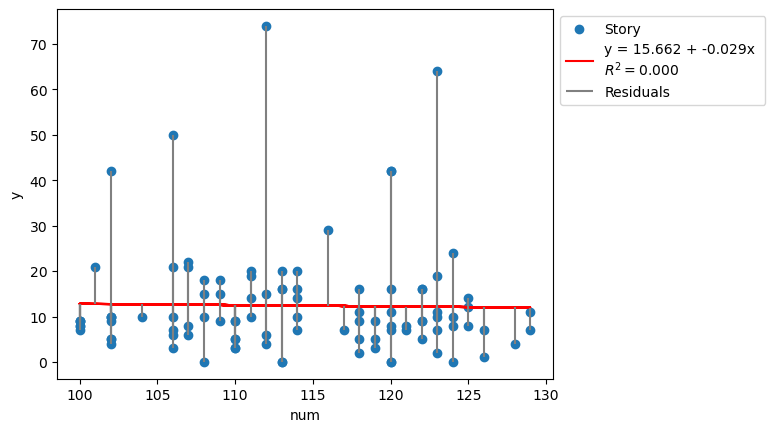

In [12]:
# Repeating the same process, using "comm" as y variable.
n = 25 # This variable is to assign a name to the figures when they are exported.
for var in predictors[:-1]:
    linregres(full_data[var], full_data["comm"], var, n)
    n += 1

linregres(full_data["num"], full_data["comm"], "num", 30)

#### Residuals Distribution

In [13]:
# Defining a formula which plots the residuals frequencies on a scatterplot.
def residuals_hist(x, y, predictor, plotyn, figname):
    # The steps in the following lines are unchanged, thus the labels are removed.
    df = pd.DataFrame({"x": x, "y": y})
    X = df["x"].values.reshape(-1, 1)
    y_clean = df["y"].values
    model = LinearRegression()
    model.fit(X, y_clean)
    y_pred = model.predict(X)
    residuals = y_clean - y_pred

    # I've re-added a condition that allows executing the function without plotting the graph...
    # in case one only wants to return the residuals as an array.
    if plotyn == True:
        plt.hist(residuals, bins = 15, edgecolor = "black")
        plt.axvline(x = 0, color = "red", linestyle = "--")
        plt.title(f"Residual Distribution (Predictor = {predictor})")
        plt.xlabel("Residual Value")
        plt.ylabel("Frequency")
        plt.savefig(f"figures/{figname}", bbox_inches = 'tight')
        plt.show()

    return residuals

In [14]:
# Calculating the ratios of number of residuals above the line of fit to number of residuals below the line of best fit.
residual_ratios = {}
for var in predictors:
    above = 0
    below = 0
    for residual in residuals_hist(full_data[var], full_data["num"], var, False, n):
        if residual > 0:
            above += 1
        else:
            below += 1
    residual_ratios[var] = above/below

residual_ratios

{'msttr': 0.8867924528301887,
 'ari': 0.8867924528301887,
 'fg': 0.8867924528301887,
 'fe': 0.9230769230769231,
 'words': 0.9230769230769231,
 'comm': 0.9230769230769231}

In [15]:
# Repeating this step using "comm" as the dependent variable.

residual_ratios_comm = {}
for var in predictors[:-1]:
    above = 0
    below = 0
    for residual in residuals_hist(full_data[var], full_data["comm"], var, False, n):
        if residual > 0:
            above += 1
        else:
            below += 1
    residual_ratios_comm[var] = above/below

for residual in residuals_hist(full_data["num"], full_data["comm"], var, False, n):
    if residual > 0:
        above += 1
    else:
        below += 1
residual_ratios_comm["num"] = above/below

residual_ratios_comm

{'msttr': 0.47058823529411764,
 'ari': 0.4492753623188406,
 'fg': 0.4084507042253521,
 'fe': 0.42857142857142855,
 'words': 0.4925373134328358,
 'num': 0.48148148148148145}

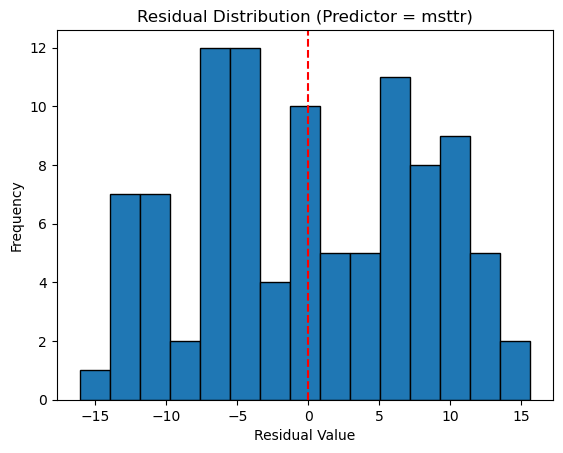

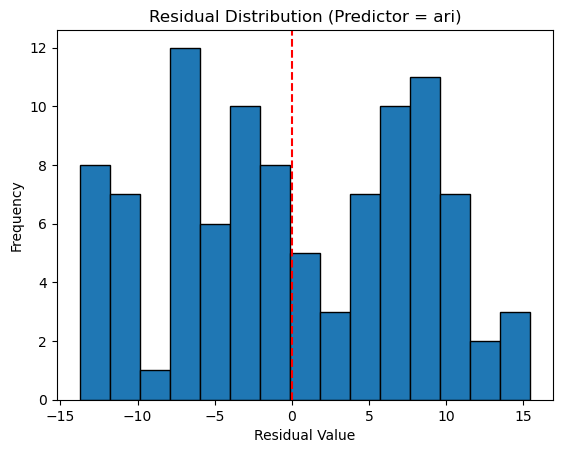

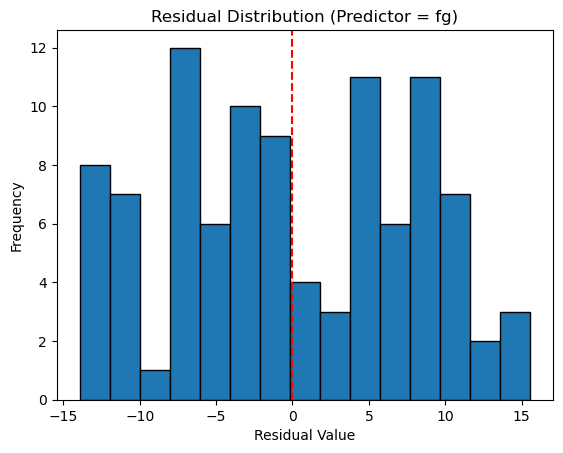

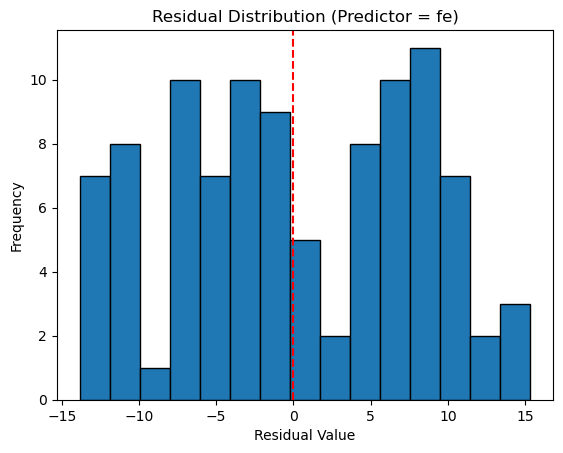

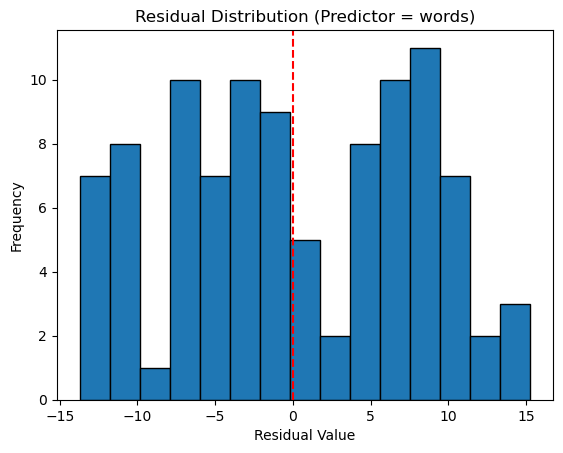

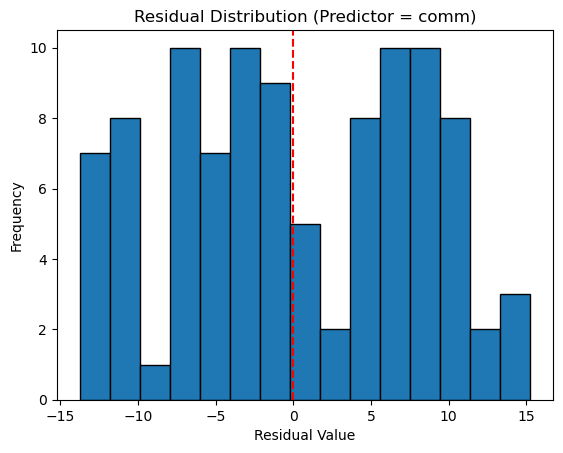

In [16]:
# Outputting the residual frequencies scatterplots.
n = 13
for var in predictors:
    residuals_hist(full_data[var], full_data["num"], var, True, n)
    n += 1

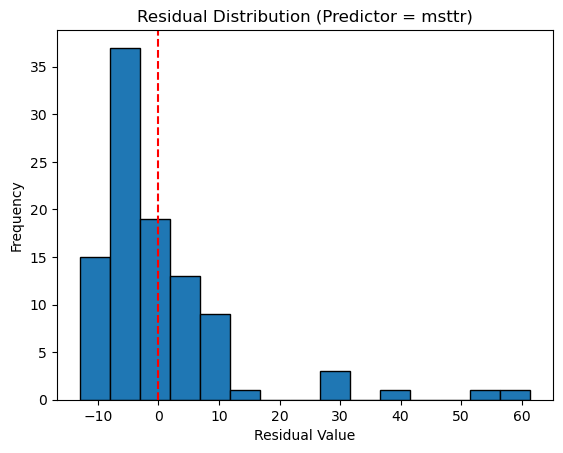

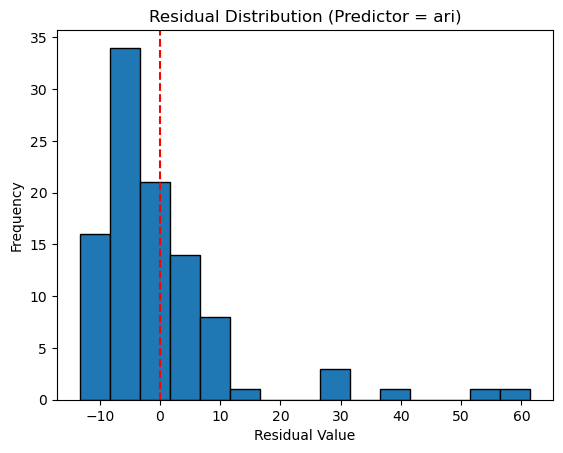

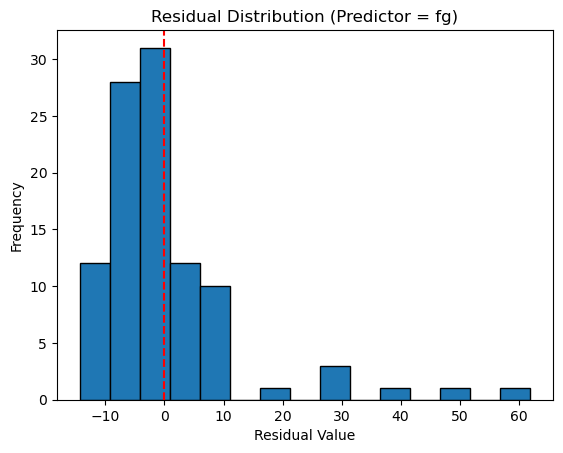

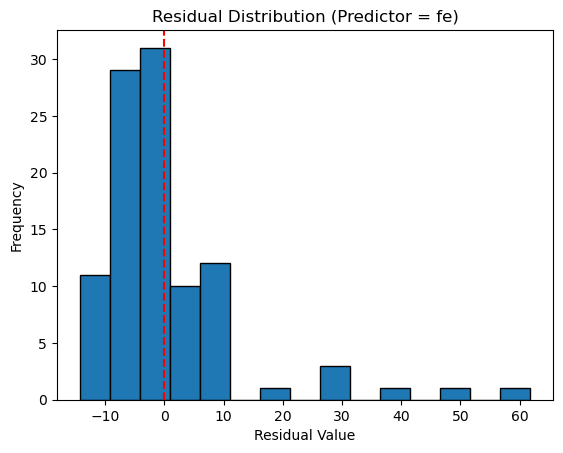

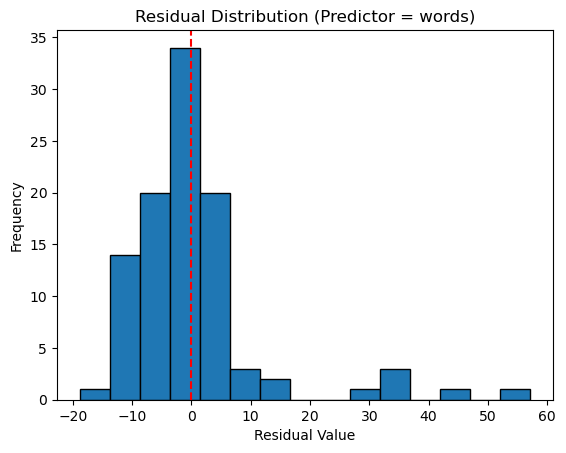

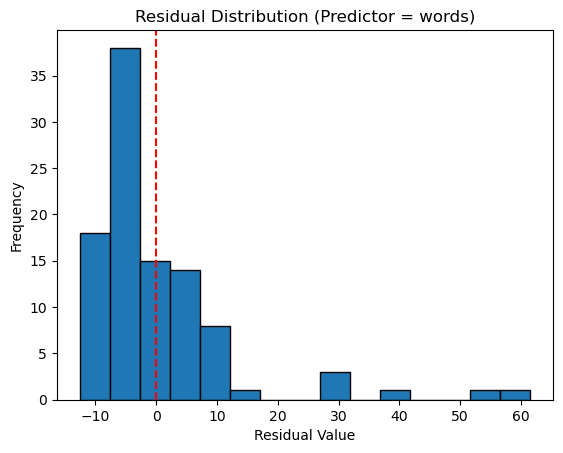

array([ -2.74466576,  -4.6016462 ,   8.36974989,   8.3983538 ,
       -12.11537972,  -5.40141883,  -8.45862665,   6.85601637,
        -2.40141883,   3.77020464,   8.22673033,  -7.51583447,
        -3.80187358,  -6.6016462 ,  -5.0581719 ,   1.59858117,
        -3.28700318,  -9.51583447,  -9.51583447,  -3.51583447,
        -3.51583447,  -0.08677581,  -5.63025011,  -2.57304229,
         6.51276944,  -7.74466576,   2.45556162,  -2.74466576,
         7.51276944,  -4.97236016,  -5.14398363,  -5.22979536,
        -5.20119145,  -4.22979536,  -2.14398363,  -3.54443838,
        16.65578899,   3.59858117,  -1.28700318,  -3.74466576,
         1.91322419,  -8.00096407,  -5.31560709,  -6.45862665,
        -9.63025011,  -0.97236016,  -6.63025011, -12.57304229,
        29.25533424,  11.88462028,  61.54137335,  -9.25839927,
        -4.20119145,  51.85601637,  -2.48723056,   7.59858117,
        -4.11537972,  -4.08677581,  -1.14398363,   1.51276944,
        -2.11537972,  -7.74466576,  -2.74466576,  -1.22

In [17]:
# Repeating this step using "comm" as dependent variable.
n = 31
for var in predictors[:-1]:
    residuals_hist(full_data[var], full_data["comm"], var, True, n)
    n += 1

residuals_hist(full_data["num"], full_data["comm"], var, True, 36)

#### Shapiro-Wilk Test

In [18]:
# Defining one more function to perform the Shapiro-Wilk test.
def residuals(x, y):
    # The steps in the following lines are unchanged, thus the labels are removed.
    df = pd.DataFrame({"x": x, "y": y})
    X = df["x"].values.reshape(-1, 1)
    y_clean = df["y"].values
    model = LinearRegression()
    model.fit(X, y_clean)
    y_pred = model.predict(X)
    residuals = y_clean - y_pred

    return {"statistic":stats.shapiro(residuals)[0], "p-value":stats.shapiro(residuals)[1]}

In [19]:
# Adding the residual metrics to the df of metrics
metricdf["residual-ratio"] = residual_ratios.values()
metricdf["statistic"] = [residuals(full_data[var], full_data["num"])["statistic"] for var in predictors]
metricdf["p-value"] = [residuals(full_data[var], full_data["num"])["p-value"] for var in predictors]
metricdf

,predictor,slope,intercept,r-squared,residual-ratio,statistic,p-value
0,msttr,59.364899,71.272043,0.006514,0.886792,0.964203,0.008109
1,ari,0.085157,113.016022,0.000451,0.886792,0.956145,0.002156
2,fg,0.245610,112.193426,0.002700,0.886792,0.959137,0.003491
3,fe,-0.017559,115.116474,0.000138,0.923077,0.955343,0.001898
4,words,-0.000009,113.743081,0.000010,0.923077,0.953877,0.001507
5,comm,-0.012928,113.860437,0.000370,0.923077,0.954784,0.001738


In [20]:
# Saving the df as a CSV.
metricdf.to_csv("metrics.csv")

In [21]:
# Finally, repeating the Shapiro-Wilk test with "comm" as y variable
for var in predictors[:-1]:
    print(residuals(full_data[var], full_data["comm"]))

print(residuals(full_data["num"], full_data["comm"]))

{'statistic': 0.7118162194476374, 'p-value': 1.0256707492280305e-12}
{'statistic': 0.7145208236270313, 'p-value': 1.1913282305424505e-12}
{'statistic': 0.7188359294761142, 'p-value': 1.5158862031627983e-12}
{'statistic': 0.7198061057035003, 'p-value': 1.6008302826567597e-12}
{'statistic': 0.7387089130854569, 'p-value': 4.758335077385376e-12}
{'statistic': 0.7125104369513602, 'p-value': 1.0657554010603689e-12}
